In [126]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_excel('/kaggle/input/adidas-sales-dataset/Adidas US Sales Datasets.xlsx')
df.columns = df.iloc[3]
df = df.iloc[4:,1:].reset_index(drop=True)
df['year'] = pd.to_datetime(df['Invoice Date']).dt.year
df['month'] = pd.to_datetime(df['Invoice Date']).dt.month
df['day'] = pd.to_datetime(df['Invoice Date']).dt.day


In [127]:
df

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month,day
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store,2020,1,1
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store,2020,1,2
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store,2020,1,3
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store,2020,1,4
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store,2020,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet,2021,1,24
9644,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet,2021,1,24
9645,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet,2021,2,22
9646,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet,2021,2,22


In [128]:
df.describe(include='all')


3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month,day
count,9648,9648.0,9648,9648,9648,9648,9648,9648.0,9648.0,9648.0,9648.0,9648.00,9648,9648.000000,9648.000000,9648.000000
unique,6,4.0,724,5,50,52,6,146.0,361.0,3512.0,6510.0,127.00,3,NaN,NaN,NaN
top,Foot Locker,1185732.0,2021-01-17 00:00:00,West,California,Portland,Men's Street Footwear,50.0,225.0,100000.0,21000.0,0.35,Online,NaN,NaN,NaN
freq,2637,5265.0,77,2448,432,360,1610,557.0,207.0,52.0,34.0,1229.00,4889,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.865050,6.458126,14.696310
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.341688,3.454799,7.348019
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,3.000000,9.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,6.000000,15.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,9.000000,21.000000


Count the number of occurrences of each retailer

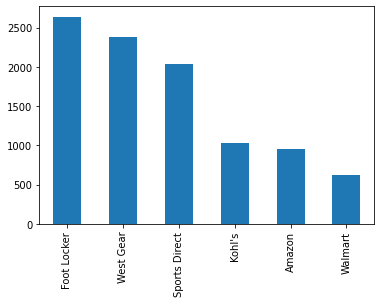

In [129]:
retailer_counts = df['Retailer'].value_counts()
# Sort the retailer counts in descending order
retailer_counts = retailer_counts.sort_values(ascending=False)
# Plot the retailer counts as a bar chart
retailer_counts.plot(kind='bar')
# Show the plot
plt.show()


# Market Share of Retailers

In [130]:
import plotly.express as px

# Group the data by retailer and sum the total sales for each retailer
retailer_sales = df.groupby('Retailer')['Total Sales'].sum()

# Calculate the total sales of all retailers
total_sales = retailer_sales.sum()

# Calculate the market share of each retailer by dividing their total sales by the total sales of all retailers
market_share = retailer_sales / total_sales

# Create a pie chart using plotly
fig = px.pie(market_share, values=market_share, names=market_share.index, title='Market Share of Retailers')

# Show the plot
fig.show()


# Total Sales by Retailer

In [131]:
# Convert the Invoice Date column to datetime data type
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Extract the month and year from the Invoice Date
df['month'] = df['Invoice Date'].dt.month
df['year'] = df['Invoice Date'].dt.year

# Group the data by retailer, year, and month and sum the total sales for each group
retailer_sales = df.groupby(['Retailer', 'year', 'month'])['Total Sales'].sum()
retailer_sales_df = retailer_sales.unstack(level=0)
retailer_sales_df = retailer_sales_df.reset_index()
fig = px.line(retailer_sales_df, x='month', y=retailer_sales_df.columns[1:], title='Total Sales by Retailer')

# Show the plot
fig.show()


# Total Sales by Product and Retailer

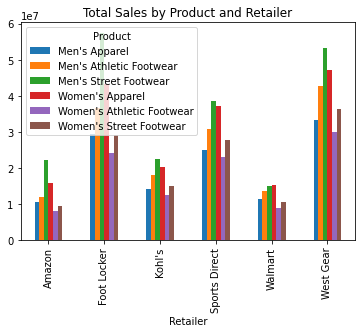

In [132]:
product_sales = df.groupby(['Retailer', 'Product'])['Total Sales'].sum()
product_sales_df = product_sales.unstack(level=1)
product_sales_df.plot(kind='bar', title='Total Sales by Product and Retailer')
plt.show()

In [133]:
retailer_sales_by_region = df.groupby(['Retailer', 'Region'])['Total Sales'].sum()

# Unstack the retailer_sales_by_region series to create a DataFrame with columns for each retailer
retailer_sales_by_region_df = retailer_sales_by_region.unstack(level=0)
retailer_sales_by_region_df
# # # Set the colors for each bar in the chart
# colors = ['blue', 'green', 'red', 'orange', 'purple']

# # # Create the bar chart using plotly
# fig = px.bar(retailer_sales_by_region_df, x=retailer_sales_by_region_df.index, y=retailer_sales_by_region_df.columns, color=colors, title='Total Sales by Retailer and Region')

# # # Show the plot
# fig.show()


Retailer,Amazon,Foot Locker,Kohl's,Sports Direct,Walmart,West Gear
Region,,,,,,
Midwest,16835873.0,47987394.0,22229415.0,26207191.0,NaN,22540586.0
Northeast,36262590.0,65326474.0,14031168.0,24698097.0,13712005.0,32293733.0
South,409091.0,9307025.0,3552055.0,65258121.0,33049858.0,33087031.0
Southeast,10826333.0,59669118.0,NaN,54178543.0,21005539.0,17491703.0
West,13365025.0,37804709.0,62302115.0,12129045.0,6791008.0,137551280.0


In [134]:
# Group the data by year and month
df_grouped = df.groupby(['year', 'month'])

# Calculate the total sales and units sold for each group
sales_by_year_month = df_grouped['Total Sales'].sum()
units_by_year_month = df_grouped['Units Sold'].sum()

# Print the resulting data frames
print(sales_by_year_month)
print(units_by_year_month)


year  month
2020  1        16253746.0
      2        14997988.0
      3        17660577.0
      4        24607006.0
      5        16918014.0
      6         8829819.0
      7        17146013.0
      8        19877980.0
      9        18304436.0
      10       10836269.0
      11        8622300.0
      12        8026527.0
2021  1        55225396.0
      2        46102165.0
      3        39148532.0
      4        47732964.0
      5        63589681.0
      6        65917553.0
      7        78334681.0
      8        72288221.0
      9        59357023.0
      10       53074764.0
      11       59235040.0
      12       77815430.0
Name: Total Sales, dtype: object
year  month
2020  1         48333
      2         37846
      3         46972
      4         54709
      5         35705
      6         16269
      7         38219
      8         62307
      9         46125
      10        30167
      11        25152
      12        20545
2021  1        179299
      2        156113
      3    

In [135]:
# Calculate the number of months since the earliest month for each year-month group
# month_offset = [(year - min_year) * 12 + (month - min_month) for year, month in sales_by_year_month.index]

# # Create a Plotly line chart showing the total sales over time
# fig = px.line(x=month_offset, y=sales_by_year_month.values, title='Adidas Sales Over Time',)
# # Display the plot
# fig.show()


In [136]:
# Group the data by region, state, and city
df_grouped = df.groupby(['Region', 'State', 'City'])

# Calculate the total sales and units sold for each group
sales_by_location = df_grouped['Total Sales'].sum()
units_by_location = df_grouped['Units Sold'].sum()

# Print the resulting data frames
print(sales_by_location)
print(units_by_location)


Region     State           City          
Midwest    Illinois        Chicago            9797488.0
           Indiana         Indianapolis       8836198.0
           Iowa            Des Moines         7424011.0
           Kansas          Wichita            9972864.0
           Michigan        Detroit           18625433.0
           Minnesota       Minneapolis        7378068.0
           Missouri        St. Louis          9683265.0
           Montana         Billings          15710886.0
           Nebraska        Omaha              5929038.0
           North Dakota    Fargo              7735580.0
           Ohio            Columbus          18484583.0
           South Dakota    Sioux Falls        8495576.0
           Wisconsin       Milwaukee          7727469.0
Northeast  Connecticut     Hartford          11573448.0
           Delaware        Wilmington        12298412.0
           Maine           Portland           9195978.0
           Maryland        Baltimore          7758059.0
      

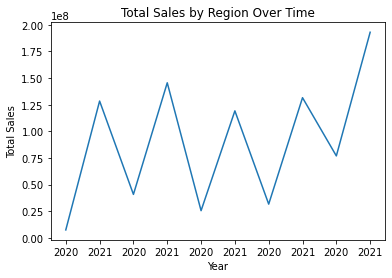

In [137]:
# Group the data by region and sum the total sales for each region
region_sales = df.groupby(['Region', 'year'])['Total Sales'].sum()

# Extract the data into separate lists for each category
regions = []
years = []
sales = []

# Iterate through the data and extract the values for each category
for (region, year), sale in region_sales.items():
    regions.append(region)
    years.append(year)
    sales.append(sale)

# Set the position of the bars on the x-axis
x_pos = list(range(len(years)))

# Create the line plot
plt.plot(x_pos, sales)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region Over Time')

# Add tick marks for the x-axis
plt.xticks(x_pos, years)

# Show the plot
plt.show()


In [138]:
# Group the data by region and product
df_grouped = df.groupby(['Region', 'Product'])

# Calculate the total sales for each group
sales_by_product = df_grouped['Total Sales'].sum()

# Sort the data by total sales
sales_by_product = sales_by_product.sort_values(ascending=False)

# Select the top selling products for each region
top_products = {}
for region, group in sales_by_product.groupby(level=0):
    top_products[region] = group.head(5)

# Print the top selling products for each region
for region, products in top_products.items():
    print(f'Top selling products in {region}:')
    for product, sales in products.items():
        print(f'  - {product}: {sales:,.2f}')

Top selling products in Midwest:
  - ('Midwest', "Men's Street Footwear"): 38,322,810.00
  - ('Midwest', "Women's Apparel"): 28,206,383.00
  - ('Midwest', "Men's Athletic Footwear"): 21,305,539.00
  - ('Midwest', "Men's Apparel"): 18,125,661.00
  - ('Midwest', "Women's Street Footwear"): 16,244,898.00
Top selling products in Northeast:
  - ('Northeast', "Men's Street Footwear"): 51,025,024.00
  - ('Northeast', "Women's Apparel"): 37,543,083.00
  - ('Northeast', "Men's Athletic Footwear"): 28,874,237.00
  - ('Northeast', "Men's Apparel"): 25,744,412.00
  - ('Northeast', "Women's Street Footwear"): 23,341,173.00
Top selling products in South:
  - ('South', "Women's Apparel"): 29,607,187.00
  - ('South', "Men's Street Footwear"): 28,444,561.00
  - ('South', "Men's Athletic Footwear"): 25,710,545.00
  - ('South', "Women's Street Footwear"): 22,777,097.00
  - ('South', "Men's Apparel"): 19,703,069.00
Top selling products in Southeast:
  - ('Southeast', "Men's Street Footwear"): 36,019,236.0

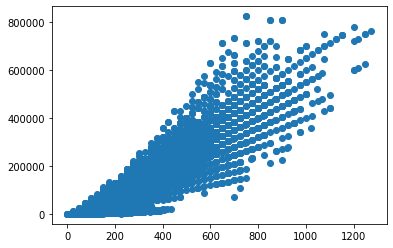

In [139]:
# Extract the data into separate lists
units_sold = df['Units Sold']
total_sales = df['Total Sales']

# Create the plot
fig, ax = plt.subplots()
ax.scatter(units_sold, total_sales)

# Show the plot
plt.show()


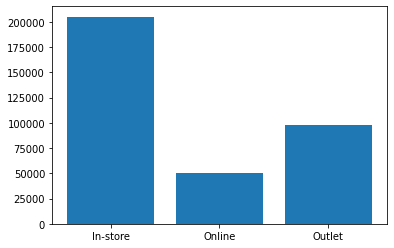

In [140]:
# Group the data by Sales Method and calculate the average Total Sales for each group
sales_by_method = df.groupby('Sales Method')['Total Sales'].mean()

# Extract the data into separate lists
sales_methods = []
avg_total_sales = []

# Iterate through the groupby object and extract the values
for method, sales in sales_by_method.items():
    sales_methods.append(method)
    avg_total_sales.append(sales)

# Create the plot
fig, ax = plt.subplots()
ax.bar(sales_methods, avg_total_sales)

# Show the plot
plt.show()


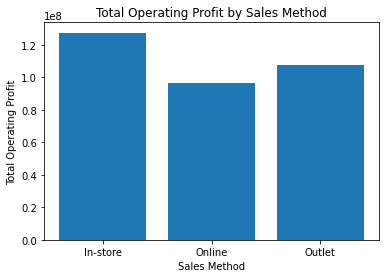

In [141]:
# Group the data by Sales Method and calculate the total Operating Profit for each group
profit_by_method = df.groupby('Sales Method')['Operating Profit'].sum()

# Extract the data into separate lists
sales_methods = []
total_profits = []

# Iterate through the groupby object and extract the values
for method, profit in profit_by_method.items():
    sales_methods.append(method)
    total_profits.append(profit)

# Create the plot
fig, ax = plt.subplots()
ax.bar(sales_methods, total_profits)

# Add axis labels and a title
ax.set_xlabel('Sales Method')
ax.set_ylabel('Total Operating Profit')
ax.set_title('Total Operating Profit by Sales Method')

# Show the plot
plt.show()


Based on the data, it appears that the** In-store sales method has the highest total operating profit**, followed by the Online and Outlet sales methods. This suggests that the In-store sales method is the most successful in terms of operating profit. It's worth noting that other factors, such as the number of sales made through each method and the costs associated with each method, could also be contributing to the overall operating profit. It may be helpful to further analyze the data to better understand the differences in performance between the various sales methods.

In [142]:
df = df.rename(columns={'state': 'State'})
units_by_year_and_state = df.groupby(['year', 'State'])['Units Sold'].sum()


<AxesSubplot:xlabel='year'>

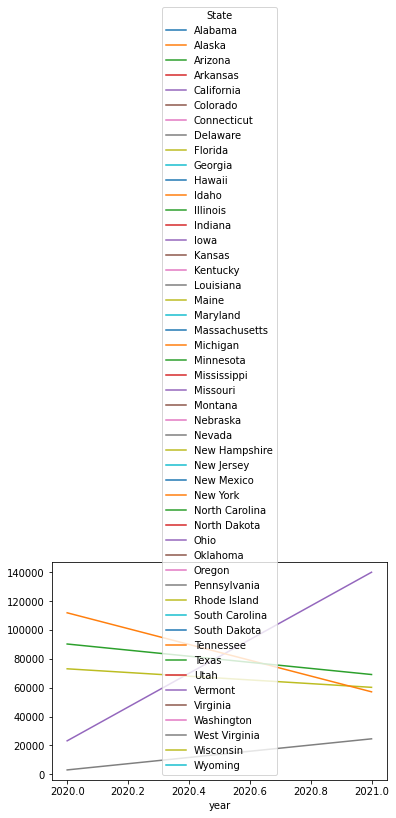

In [143]:
# Group the data by year and state, and calculate the sum of units sold for each group
units_by_year_and_state = df.groupby(['year', 'State'])['Units Sold'].sum()

# Convert the resulting data frame to a long-form data frame
units_by_year_and_state = units_by_year_and_state.reset_index()

# Pivot the data frame to create a column for each state
units_by_year = units_by_year_and_state.pivot(index='year', columns='State', values='Units Sold')

# Plot the data
units_by_year.plot()


<AxesSubplot:title={'center':'Units Sold by Year and State'}, xlabel='Year', ylabel='Units Sold'>

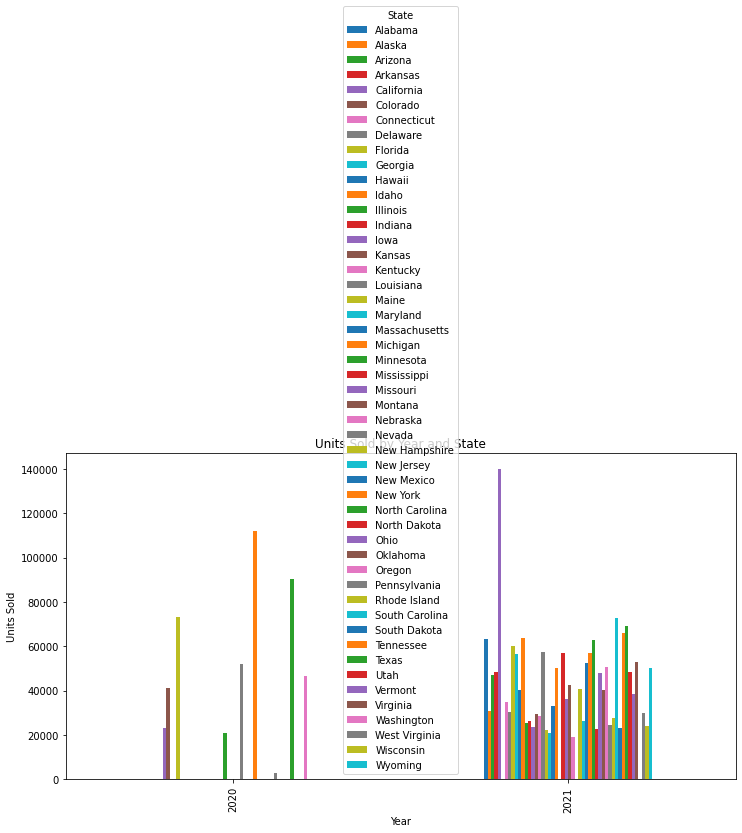

In [144]:
# units_by_year.plot(kind='bar', title='Units Sold by Year and State', xlabel='Year', ylabel='Units Sold')
units_by_year.plot(kind='bar', title='Units Sold by Year and State', xlabel='Year', ylabel='Units Sold', figsize=(12, 6),)


In [145]:
df

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month,day
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store,2020,1,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store,2020,1,2
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store,2020,1,3
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store,2020,1,4
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store,2020,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet,2021,1,24
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet,2021,1,24
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet,2021,2,22
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet,2021,2,22


# The analysis of the Adidas sales data continues in the next section of the notebook.